# Projet Pyhton
## Analyse des Avis et Alertes ANSSI avec Enrichissement des CVE

Le projet a pour but de développer un outil permettant d’analyser et d’enrichir les données sur les vulnérabilités et menaces en cybersécurité publiées par l’**ANSSI** (Agence Nationale de la Sécurité des Systèmes d’Information), afin d’aider à mieux identifier, prioriser et prévenir les risques, tout en générant des alertes personnalisées pour renforcer la sécurité des systèmes informatiques.

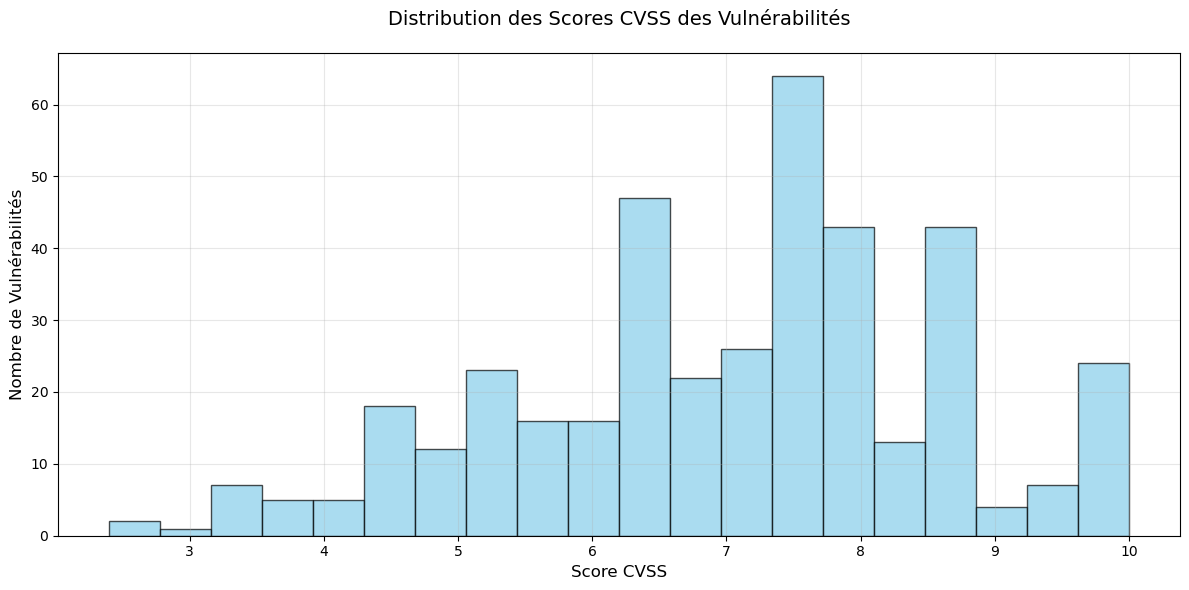

Statistique,Valeur
Nombre de valeurs,398
Moyenne,7.00
Écart-type,1.60
Minimum,2.40
Premier quartile (25%),6.00
Médiane,7.30
Troisième quartile (75%),7.80
Maximum,10.00


In [10]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création de la figure et des axes
plt.figure(figsize=(12, 6))

# Création de l'histogramme
plt.hist(df['Score CVSS'].dropna(), 
         bins=20,  
         color='skyblue',  
         edgecolor='black',
         alpha=0.7)

# Personnalisation du graphique
plt.title('Distribution des Scores CVSS des Vulnérabilités', 
          fontsize=14, 
          pad=20)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Nombre de Vulnérabilités', fontsize=12)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(True, alpha=0.3)

# Ajustement des marges
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un DataFrame pour les statistiques descriptives
stats_desc = df['Score CVSS'].describe()
stats_df = pd.DataFrame({
    'Statistique': [
        'Nombre de valeurs',
        'Moyenne',
        'Écart-type',
        'Minimum',
        'Premier quartile (25%)',
        'Médiane',
        'Troisième quartile (75%)',
        'Maximum'
    ],
    'Valeur': [
        f"{stats_desc['count']:.0f}",
        f"{stats_desc['mean']:.2f}",
        f"{stats_desc['std']:.2f}",
        f"{stats_desc['min']:.2f}",
        f"{stats_desc['25%']:.2f}",
        f"{stats_desc['50%']:.2f}",
        f"{stats_desc['75%']:.2f}",
        f"{stats_desc['max']:.2f}"
    ]
})

# Affichage du tableau des statistiques
display(stats_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

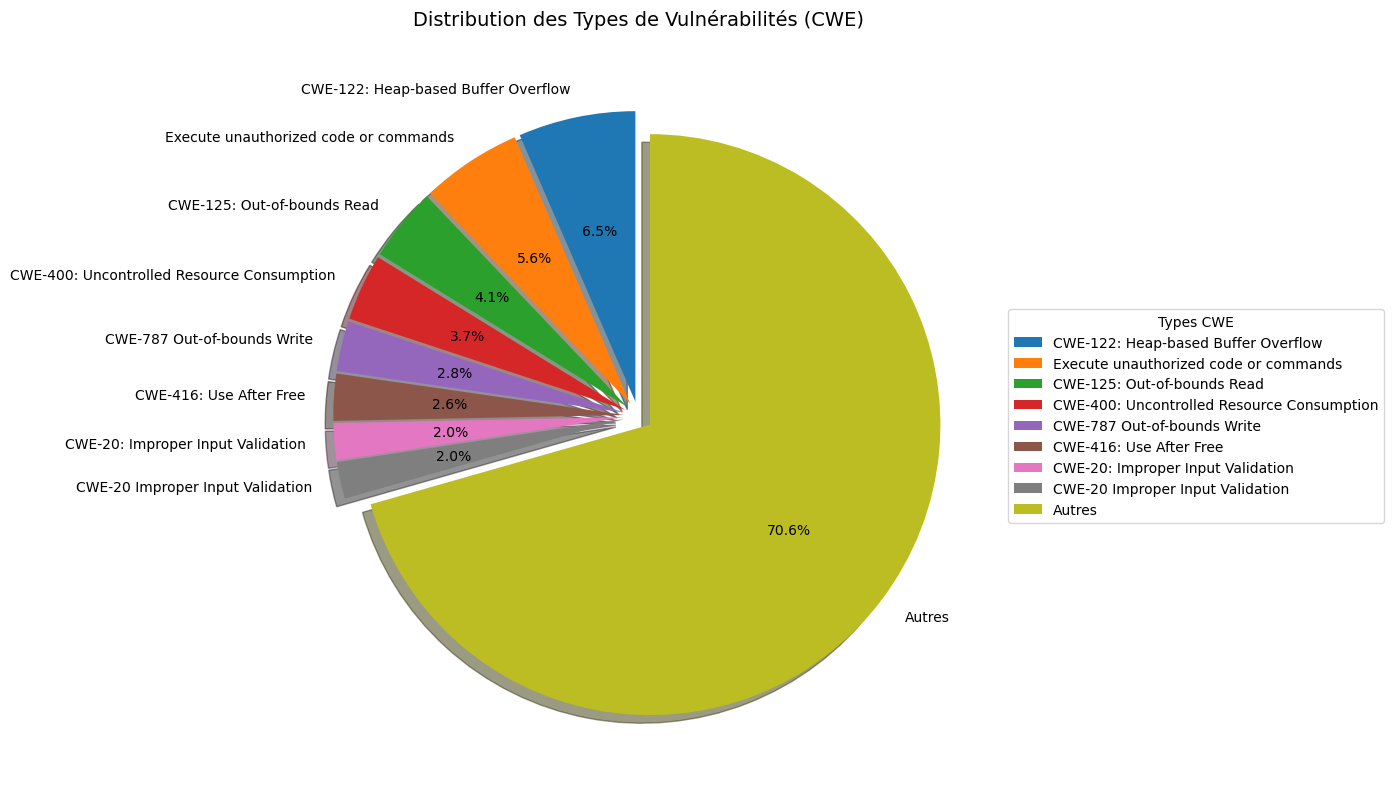

Type CWE,Nombre,Pourcentage
CWE-122: Heap-based Buffer Overflow,35,6.500000
Execute unauthorized code or commands,30,5.600000
CWE-125: Out-of-bounds Read,22,4.100000
CWE-400: Uncontrolled Resource Consumption,20,3.700000
CWE-787 Out-of-bounds Write,15,2.800000
CWE-416: Use After Free,14,2.600000
CWE-20: Improper Input Validation,11,2.000000
CWE-20 Improper Input Validation,11,2.000000
Autres,379,70.600000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Comptage des types CWE
cwe_counts = df['Type CWE'].value_counts()

# Regroupement des catégories moins fréquentes
threshold = cwe_counts.sum() * 0.02  # 2% du total
other_count = cwe_counts[cwe_counts < threshold].sum()
cwe_counts_filtered = cwe_counts[cwe_counts >= threshold]
cwe_counts_filtered['Autres'] = other_count

# Création de la figure avec une taille plus grande
plt.figure(figsize=(12, 8))

# Création du diagramme circulaire
plt.pie(cwe_counts_filtered, 
        labels=cwe_counts_filtered.index,
        autopct='%1.1f%%',  # Affichage des pourcentages
        startangle=90,      # Rotation du diagramme
        shadow=True,        # Ajout d'une ombre
        explode=[0.05] * len(cwe_counts_filtered))  # Séparation légère des sections

# Titre
plt.title('Distribution des Types de Vulnérabilités (CWE)', 
          pad=20, 
          fontsize=14)

# Ajout d'une légende
plt.legend(cwe_counts_filtered.index,
          title="Types CWE",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un tableau récapitulatif
summary_df = pd.DataFrame({
    'Type CWE': cwe_counts_filtered.index,
    'Nombre': cwe_counts_filtered.values,
    'Pourcentage': (cwe_counts_filtered.values / cwe_counts_filtered.sum() * 100).round(1)
})

# Affichage du tableau
display(summary_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

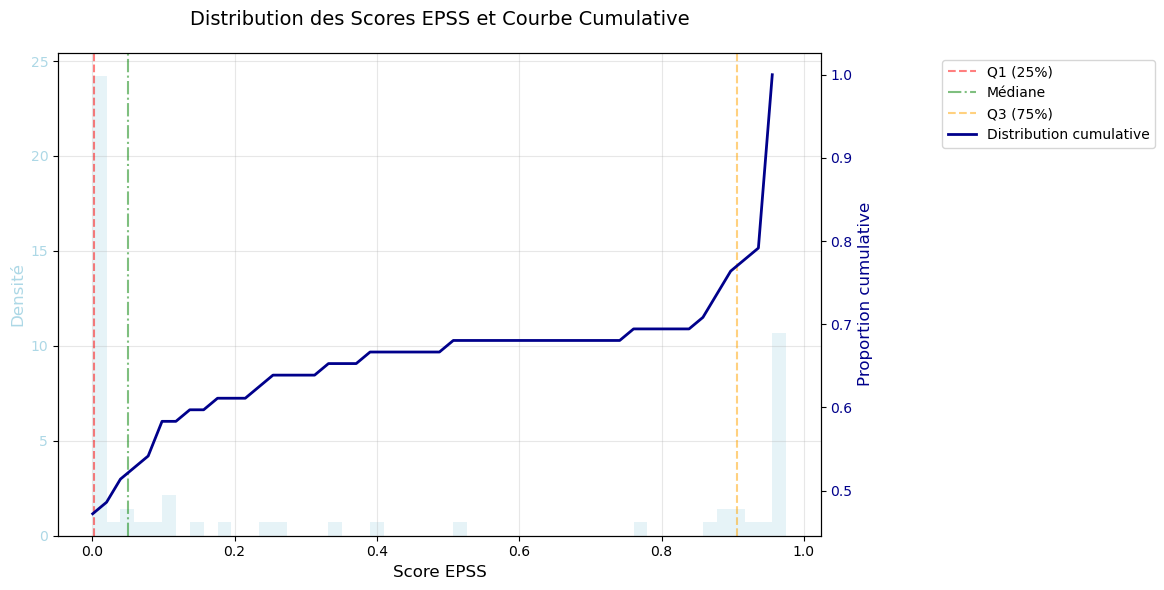

Statistique,Valeur
Nombre de valeurs,72
Moyenne,0.3393
Écart-type,0.4258
Minimum,0.0004
Premier quartile (25%),0.0018
Médiane,0.0500
Troisième quartile (75%),0.9060
Maximum,0.9751


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création d'une figure avec deux sous-graphiques superposés
fig, ax1 = plt.subplots(figsize=(12, 6))

# Création de l'histogramme (en arrière-plan)
counts, bins, _ = ax1.hist(df['Score EPSS'].dropna(), 
                          bins=50,
                          color='lightblue',
                          alpha=0.3,
                          density=True)

# Création de l'axe secondaire pour la courbe cumulative
ax2 = ax1.twinx()

# Calcul et tracé de la courbe cumulative
cumulative = np.cumsum(counts) / np.sum(counts)
ax2.plot(bins[:-1], cumulative, 
         color='darkblue', 
         linewidth=2, 
         label='Distribution cumulative')

# Personnalisation du graphique
ax1.set_title('Distribution des Scores EPSS et Courbe Cumulative', 
              fontsize=14, 
              pad=20)
ax1.set_xlabel('Score EPSS', fontsize=12)
ax1.set_ylabel('Densité', fontsize=12, color='lightblue')
ax2.set_ylabel('Proportion cumulative', fontsize=12, color='darkblue')

# Ajout d'une grille
ax1.grid(True, alpha=0.3)

# Ajustement des couleurs des axes
ax1.tick_params(axis='y', labelcolor='lightblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Ajout de lignes de référence pour les quartiles
quartiles = df['Score EPSS'].dropna().quantile([0.25, 0.5, 0.75])
styles = ['--', '-.', '--']
colors = ['red', 'green', 'orange']
labels = ['Q1 (25%)', 'Médiane', 'Q3 (75%)']

for q, style, color, label in zip(quartiles, styles, colors, labels):
    ax1.axvline(x=q, linestyle=style, color=color, alpha=0.5, label=label)

# Ajout des légendes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', 
          bbox_to_anchor=(1.15, 1))

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un tableau des statistiques descriptives
stats_desc = df['Score EPSS'].describe()
stats_df = pd.DataFrame({
    'Statistique': [
        'Nombre de valeurs',
        'Moyenne',
        'Écart-type',
        'Minimum',
        'Premier quartile (25%)',
        'Médiane',
        'Troisième quartile (75%)',
        'Maximum'
    ],
    'Valeur': [
        f"{stats_desc['count']:.0f}",
        f"{stats_desc['mean']:.4f}",
        f"{stats_desc['std']:.4f}",
        f"{stats_desc['min']:.4f}",
        f"{stats_desc['25%']:.4f}",
        f"{stats_desc['50%']:.4f}",
        f"{stats_desc['75%']:.4f}",
        f"{stats_desc['max']:.4f}"
    ]
})

# Affichage du tableau
display(stats_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

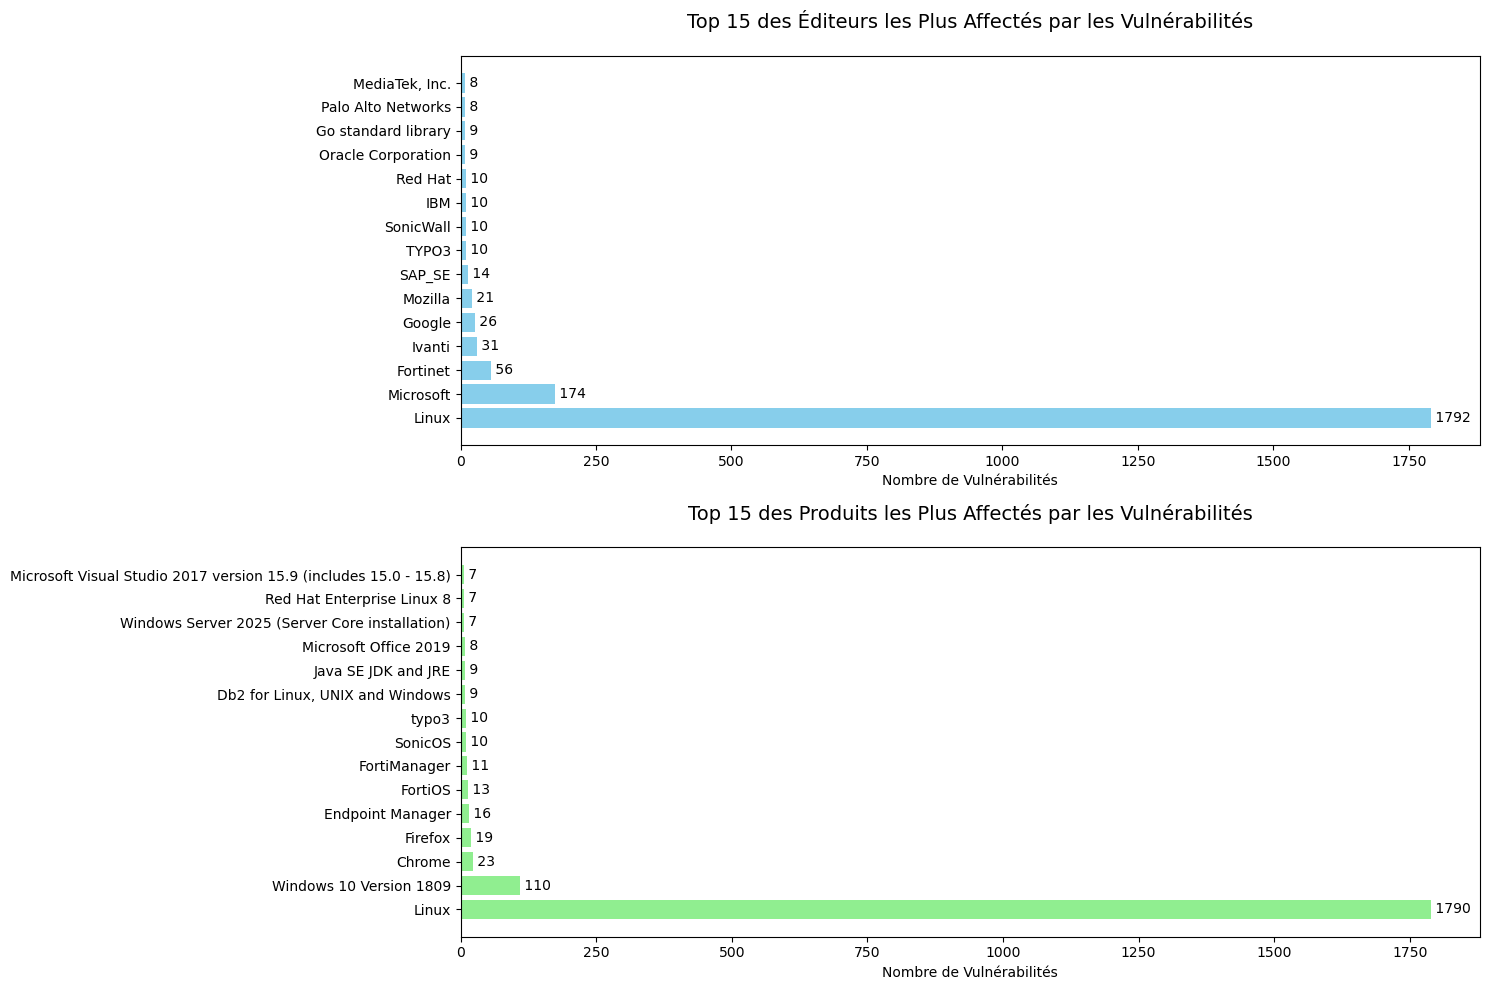

Statistiques des Éditeurs les Plus Affectés:


Éditeur,Nombre de Vulnérabilités,Pourcentage du Total
Linux,1792,73.380000
Microsoft,174,7.130000
Fortinet,56,2.290000
Ivanti,31,1.270000
Google,26,1.060000
Mozilla,21,0.860000
SAP_SE,14,0.570000
TYPO3,10,0.410000
SonicWall,10,0.410000
IBM,10,0.410000



Statistiques des Produits les Plus Affectés:


Produit,Nombre de Vulnérabilités,Pourcentage du Total
Linux,1790,73.300000
Windows 10 Version 1809,110,4.500000
Chrome,23,0.940000
Firefox,19,0.780000
Endpoint Manager,16,0.660000
FortiOS,13,0.530000
FortiManager,11,0.450000
SonicOS,10,0.410000
typo3,10,0.410000
"Db2 for Linux, UNIX and Windows",9,0.370000



Statistiques Globales:
Nombre total de vulnérabilités: 2442
Nombre total d'éditeurs uniques: 77
Nombre total de produits uniques: 183
Moyenne de vulnérabilités par éditeur: 31.71
Moyenne de vulnérabilités par produit: 13.34


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création de deux figures séparées (une pour les éditeurs, une pour les produits)
plt.figure(figsize=(15, 10))

# 1. Top 15 des éditeurs les plus affectés
plt.subplot(2, 1, 1)
editor_counts = df['Éditeur'].value_counts().head(15)
bars = plt.barh(editor_counts.index, editor_counts.values, color='skyblue')
plt.title('Top 15 des Éditeurs les Plus Affectés par les Vulnérabilités', pad=20, fontsize=14)
plt.xlabel('Nombre de Vulnérabilités')

# Ajout des valeurs sur les barres
for i, v in enumerate(editor_counts.values):
    plt.text(v, i, f' {v}', va='center', fontsize=10)

# 2. Top 15 des produits les plus affectés
plt.subplot(2, 1, 2)
product_counts = df['Produit'].value_counts().head(15)
bars = plt.barh(product_counts.index, product_counts.values, color='lightgreen')
plt.title('Top 15 des Produits les Plus Affectés par les Vulnérabilités', pad=20, fontsize=14)
plt.xlabel('Nombre de Vulnérabilités')

# Ajout des valeurs sur les barres
for i, v in enumerate(product_counts.values):
    plt.text(v, i, f' {v}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Création des tableaux détaillés
# Pour les éditeurs
editor_stats = pd.DataFrame({
    'Éditeur': editor_counts.index,
    'Nombre de Vulnérabilités': editor_counts.values,
    'Pourcentage du Total': (editor_counts.values / len(df) * 100).round(2)
})

# Pour les produits
product_stats = pd.DataFrame({
    'Produit': product_counts.index,
    'Nombre de Vulnérabilités': product_counts.values,
    'Pourcentage du Total': (product_counts.values / len(df) * 100).round(2)
})

# Affichage des tableaux
print("Statistiques des Éditeurs les Plus Affectés:")
display(editor_stats.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

print("\nStatistiques des Produits les Plus Affectés:")
display(product_stats.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

# Calcul des statistiques supplémentaires
total_vulnerabilities = len(df)
total_editors = df['Éditeur'].nunique()
total_products = df['Produit'].nunique()

print(f"\nStatistiques Globales:")
print(f"Nombre total de vulnérabilités: {total_vulnerabilities}")
print(f"Nombre total d'éditeurs uniques: {total_editors}")
print(f"Nombre total de produits uniques: {total_products}")
print(f"Moyenne de vulnérabilités par éditeur: {(total_vulnerabilities/total_editors):.2f}")
print(f"Moyenne de vulnérabilités par produit: {(total_vulnerabilities/total_products):.2f}")

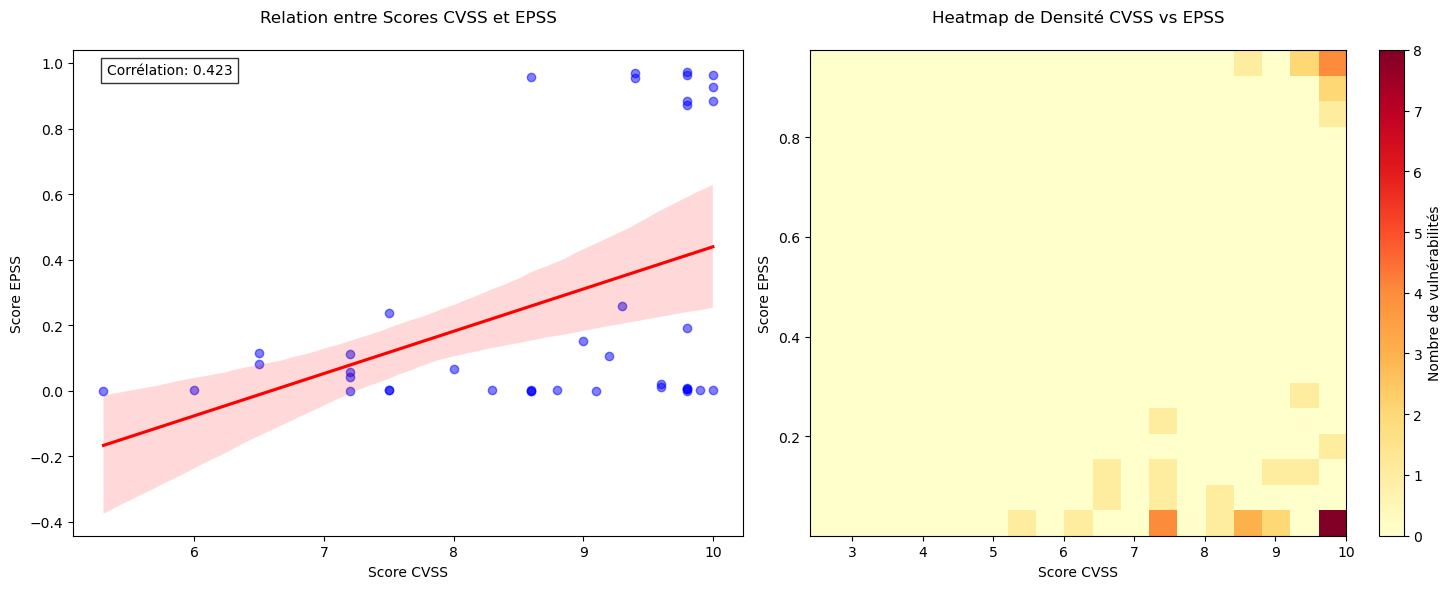

Métrique,Valeur
Coefficient de corrélation,0.423
P-value,nan
Nombre d'observations,2442
CVSS moyen,7.00
EPSS moyen,0.3393
Écart-type CVSS,1.60
Écart-type EPSS,0.4258



Analyse par quartiles de CVSS:


,mean,std,count
Score CVSS,,,
Q1,0.0006,NaN,1
Q2,0.0589,0.0479,7
Q3,0.0801,0.1357,3
Q4,0.3512,0.4356,29


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création d'une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Graphique de dispersion avec ligne de régression
sns.regplot(data=df, x='Score CVSS', y='Score EPSS', ax=ax1,
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color': 'red'})

ax1.set_title('Relation entre Scores CVSS et EPSS', fontsize=12, pad=20)
ax1.set_xlabel('Score CVSS')
ax1.set_ylabel('Score EPSS')

# Calcul du coefficient de corrélation
correlation = df['Score CVSS'].corr(df['Score EPSS'])
ax1.text(0.05, 0.95, f'Corrélation: {correlation:.3f}', 
         transform=ax1.transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# 2. Heatmap 2D
x_bins = np.linspace(df['Score CVSS'].min(), df['Score CVSS'].max(), 20)
y_bins = np.linspace(df['Score EPSS'].min(), df['Score EPSS'].max(), 20)

heatmap_data, xedges, yedges = np.histogram2d(df['Score CVSS'], df['Score EPSS'], 
                                             bins=[x_bins, y_bins])

im = ax2.imshow(heatmap_data.T, origin='lower', aspect='auto',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                cmap='YlOrRd')

ax2.set_title('Heatmap de Densité CVSS vs EPSS', fontsize=12, pad=20)
ax2.set_xlabel('Score CVSS')
ax2.set_ylabel('Score EPSS')

plt.colorbar(im, ax=ax2, label='Nombre de vulnérabilités')

plt.tight_layout()
plt.show()

# Statistiques
statistics_df = pd.DataFrame({
    'Métrique': [
        'Coefficient de corrélation',
        'P-value',
        'Nombre d\'observations',
        'CVSS moyen',
        'EPSS moyen',
        'Écart-type CVSS',
        'Écart-type EPSS'
    ],
    'Valeur': [
        f"{correlation:.3f}",
        f"{stats.pearsonr(df['Score CVSS'], df['Score EPSS'])[1]:.3e}",
        len(df),
        f"{df['Score CVSS'].mean():.2f}",
        f"{df['Score EPSS'].mean():.4f}",
        f"{df['Score CVSS'].std():.2f}",
        f"{df['Score EPSS'].std():.4f}"
    ]
})

# Affichage du tableau des statistiques
display(statistics_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

# Analyse par quartiles avec observed=True
print("\nAnalyse par quartiles de CVSS:")
cvss_quartiles = pd.qcut(df['Score CVSS'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartile_analysis = df.groupby(cvss_quartiles, observed=True)['Score EPSS'].agg(['mean', 'std', 'count']).round(4)
display(quartile_analysis)

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

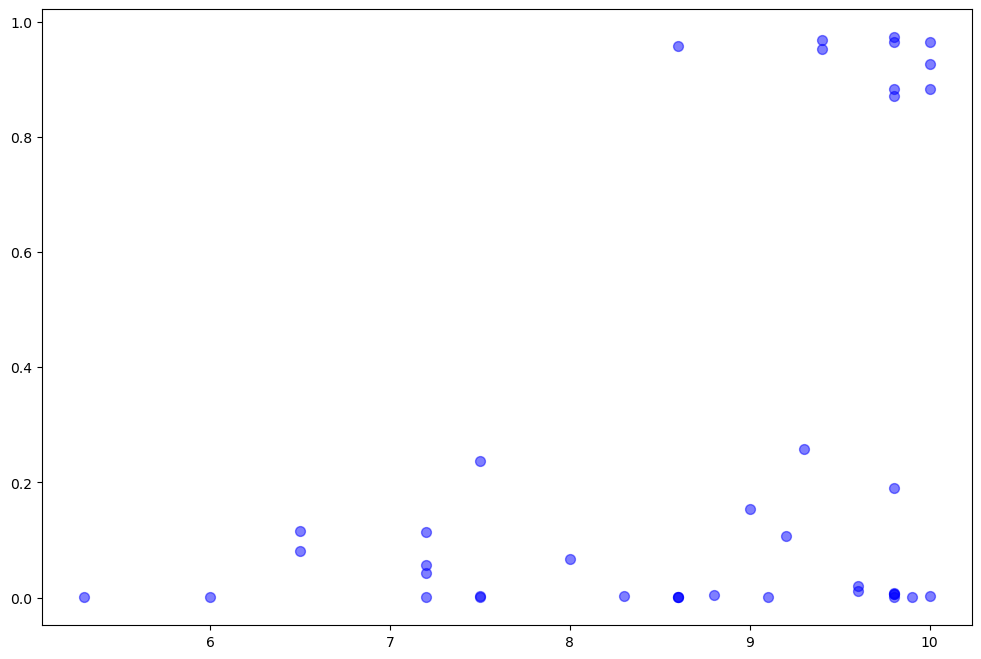

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création de la figure
plt.figure(figsize=(12, 8))

# Création du nuage de points
plt.scatter(df['Score CVSS'], df['Score EPSS'], 
           alpha=0.5,  # Transparence pour mieux voir la densité
           c='blue',   # Couleur des points
           s=50)       # Taille des points

# Ajout de la ligne de régression
z = np.polyfit(df['Score CVSS'], df['Score EPSS'], 1)
p = np.poly1d(z)
plt.plot(df['Score CVSS'], p(df['Score CVSS']), 
         "r--", 
         alpha=0.8,
         label=f'Régression linéaire (y = {z[0]:.4f}x + {z[1]:.4f})')

# Calcul et ajout du coefficient de corrélation
correlation = df['Score CVSS'].corr(df['Score EPSS'])
plt.text(0.05, 0.95, 
         f'Coefficient de corrélation: {correlation:.3f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Personnalisation du graphique
plt.title('Relation entre Score CVSS et Score EPSS', fontsize=14, pad=20)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Score EPSS', fontsize=12)

# Ajout d'une grille
plt.grid(True, alpha=0.3)

# Ajout de la légende
plt.legend()

# Ajustement des marges
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un tableau d'analyse statistique détaillé
def calculate_statistics_by_cvss_range(df, range_start, range_end):
    mask = (df['Score CVSS'] >= range_start) & (df['Score CVSS'] < range_end)
    subset = df[mask]
    if len(subset) == 0:
        return pd.Series({'Nombre': 0, 'EPSS moyen': 0, 'EPSS médian': 0, 'Écart-type EPSS': 0})
    return pd.Series({
        'Nombre': len(subset),
        'EPSS moyen': subset['Score EPSS'].mean(),
        'EPSS médian': subset['Score EPSS'].median(),
        'Écart-type EPSS': subset['Score EPSS'].std()
    })

# Création des plages CVSS
ranges = [(0,4), (4,6), (6,8), (8,10)]
stats_by_range = pd.DataFrame([
    calculate_statistics_by_cvss_range(df, start, end) 
    for start, end in ranges
], index=[f'CVSS {start}-{end}' for start, end in ranges])

# Formatage des valeurs numériques
stats_by_range['EPSS moyen'] = stats_by_range['EPSS moyen'].round(4)
stats_by_range['EPSS médian'] = stats_by_range['EPSS médian'].round(4)
stats_by_range['Écart-type EPSS'] = stats_by_range['Écart-type EPSS'].round(4)

# Affichage des statistiques
print("Analyse détaillée par plage de CVSS:")
display(stats_by_range)

# Statistiques globales
print("\nStatistiques globales:")
global_stats = pd.DataFrame({
    'Métrique': [
        'Nombre total de vulnérabilités',
        'Coefficient de corrélation',
        'P-value',
        'CVSS moyen',
        'EPSS moyen',
        'CVSS médian',
        'EPSS médian'
    ],
    'Valeur': [
        len(df),
        f"{correlation:.3f}",
        f"{stats.pearsonr(df['Score CVSS'], df['Score EPSS'])[1]:.3e}",
        f"{df['Score CVSS'].mean():.2f}",
        f"{df['Score EPSS'].mean():.4f}",
        f"{df['Score CVSS'].median():.2f}",
        f"{df['Score EPSS'].median():.4f}"
    ]
})

display(global_stats.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))